In [18]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from car_data import priuses

In [2]:
def plot_mileage_price(cars):
    prices = [c.price for c in cars]
    mileages = [c.mileage for c in cars]
    plt.scatter(mileages, prices, alpha=0.5)
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

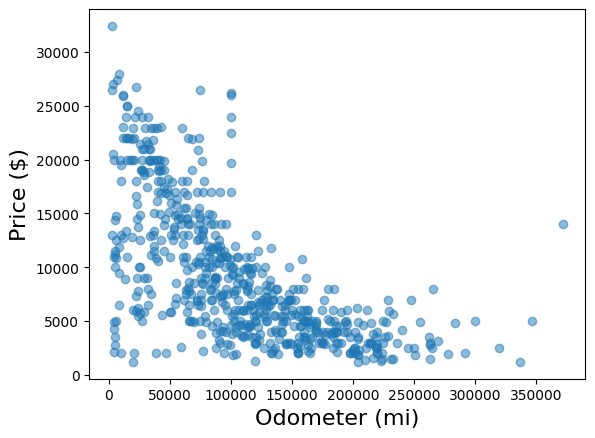

In [3]:
plot_mileage_price(priuses)

In [4]:
def sum_squared_error(f, data):
    squared_errors = [(f(x) - y)** 2 for (x, y) in data]
    return sum(squared_errors)

In [5]:
prisues_mileage_price = [(p.mileage, p.price) for p in priuses]

In [6]:
def p1(x):
    return 25000 - 0.2 * x
def p2(x):
    return 25000 - 0.1 * x
def p3(x):
    return 22500 - 0.1 * x

In [7]:
sum_squared_error(p1, prisues_mileage_price)

88782506640.23996

In [8]:
sum_squared_error(p2, prisues_mileage_price)

34723507681.55999

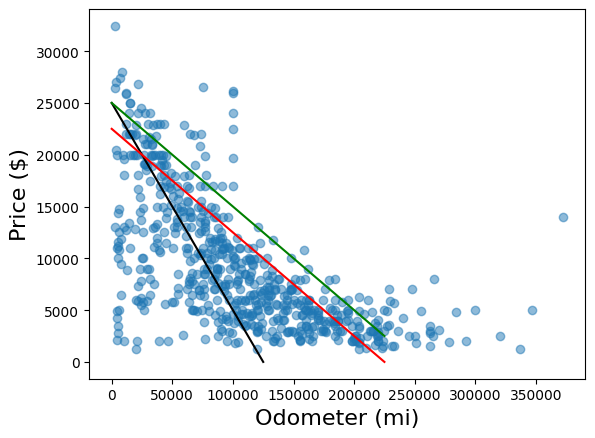

In [9]:
plot_mileage_price(priuses)
plot_function(p1, 0, 125000, c='black')
plot_function(p2, 0, 225000, c='green')
plot_function(p3, 0, 225000, c='red')

### 14.3.2　找到并绘制最佳拟合线

In [10]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prisues_mileage_price)

def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

In [14]:
def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

In [20]:
c,d = gradient_descent(scaled_cost_function, 0, 0)
(c,d)

(-0.12111901781177636, 0.31495422888044716)

In [24]:
a, b = 0.5*c, 50000*d
(a,b)

(-0.06055950890588818, 15747.711444022358)

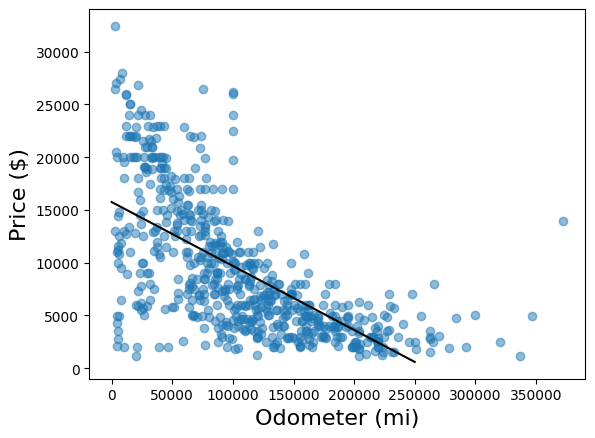

In [28]:
plot_mileage_price(priuses)
def p(x):
    return -0.0606*x + 15747
plot_function(p, 0, 250000, c='black')

### 14.4.2　寻找最佳拟合的指数函数

In [29]:
from math import exp

In [31]:
def exp_coefficient_cost(q, r):
    def f(x):
        return q*exp(r*x)
    return sum_squared_error(f, prisues_mileage_price)

In [32]:
def scaled_exp_coefficient_cost(s,t):
    return exp_coefficient_cost(30000*s,1e-4*t) / 1e11

In [43]:
# def plot_function(f,xmin,xmax,**kwargs):
#     ts = np.linspace(xmin,xmax,1000)
#     plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

<Figure size 700x700 with 0 Axes>

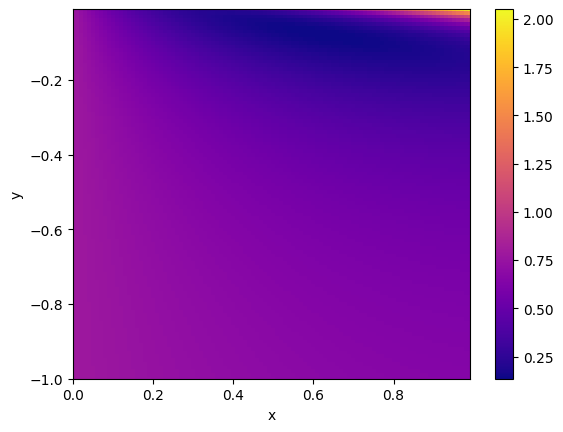

In [47]:
scalar_field_heatmap(scaled_exp_coefficient_cost, 0, 1, -1, 0)

In [48]:
s,t = gradient_descent(scaled_exp_coefficient_cost, 0, 0)
(s,t)

(0.6235404892778865, -0.07686877730930745)

In [49]:
q, r = 30000*s,1e-4*t
(q, r)

(18706.214678336597, -7.686877730930746e-06)

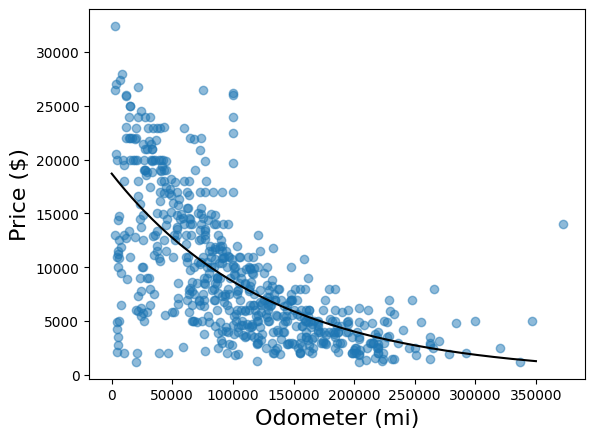

In [52]:
def p(x):
    return 18706*exp(-0.00000768*x)
plot_mileage_price(priuses)
plot_function(p, 0, 350000, c='black')